# Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

LABELS=["Normal","Anomaly"]

/home/amal/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/amal/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/amal/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/amal/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: P

In [4]:
df = pd.read_csv("ALOIData_train_withtimestamp.csv")

In [5]:
df.head()

,TIME_STAMP,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att20,att21,att22,att23,att24,att25,att26,att27,id,label
0,7/19/2010 13:01,0.054536,0.011316,0.012964,0.009913,0.016966,0.000034,0.000063,0.000000,0.004458,...,0.000000,0.0,0.008445,0.000034,0.000002,0.006827,0.000018,0.000025,49186.0,'no'
1,7/20/2010 13:01,0.006309,0.000014,0.000190,0.001101,0.000420,0.000000,0.000000,0.000000,0.000066,...,0.000000,0.0,0.000000,0.000063,0.000009,0.000000,0.000081,0.000504,49841.0,'no'
2,7/21/2010 13:01,0.000726,0.000005,0.000344,0.000443,0.000011,0.000000,0.000000,0.000000,0.000500,...,0.000002,0.0,0.000167,0.000081,0.000005,0.000084,0.002333,0.004955,49940.0,'no'
3,7/22/2010 13:01,0.014746,0.000604,0.018295,0.022452,0.005296,0.000382,0.000832,0.000226,0.007175,...,0.000000,0.0,0.000538,0.000007,0.000000,0.000160,0.000054,0.000920,49191.0,'no'
4,7/23/2010 13:01,0.002102,0.000007,0.001130,0.001454,0.000014,0.000000,0.000000,0.000002,0.001594,...,0.000000,0.0,0.000538,0.000136,0.000038,0.000215,0.001067,0.004693,49537.0,'no'


In [6]:
df.drop(["id"],axis=1,inplace=True)

In [7]:
df.shape

(1011, 28)

In [8]:
df= df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(how='any')

In [9]:
df.isnull().values.any()

False

In [10]:
df.replace({"label":{"'no'":0,"'yes'":1}},inplace = True)

In [11]:

df.head(50)

,TIME_STAMP,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,1tt19,att20,att21,att22,att23,att24,att25,att26,att27,label
0,7/19/2010 13:01,0.054536,0.011316,0.012964,0.009913,0.016966,0.000034,0.000063,0.000000,0.004458,...,0.001191,0.000000,0.000000,0.008445,0.000034,0.000002,0.006827,0.000018,0.000025,0
1,7/20/2010 13:01,0.006309,0.000014,0.000190,0.001101,0.000420,0.000000,0.000000,0.000000,0.000066,...,0.000000,0.000000,0.000000,0.000000,0.000063,0.000009,0.000000,0.000081,0.000504,0
2,7/21/2010 13:01,0.000726,0.000005,0.000344,0.000443,0.000011,0.000000,0.000000,0.000000,0.000500,...,0.000002,0.000002,0.000000,0.000167,0.000081,0.000005,0.000084,0.002333,0.004955,0
3,7/22/2010 13:01,0.014746,0.000604,0.018295,0.022452,0.005296,0.000382,0.000832,0.000226,0.007175,...,0.000226,0.000000,0.000000,0.000538,0.000007,0.000000,0.000160,0.000054,0.000920,0
4,7/23/2010 13:01,0.002102,0.000007,0.001130,0.001454,0.000014,0.000000,0.000000,0.000002,0.001594,...,0.000002,0.000000,0.000000,0.000538,0.000136,0.000038,0.000215,0.001067,0.004693,0
5,7/24/2010 13:01,0.153772,0.003183,0.000000,0.002012,0.020126,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
6,7/25/2010 13:01,0.000321,0.000000,0.000095,0.000086,0.000000,0.000000,0.000000,0.000000,0.000769,...,0.000000,0.000002,0.000000,0.000002,0.000836,0.001496,0.000000,0.001980,0.024916,0
7,7/26/2010 13:01,0.004729,0.000018,0.000199,0.000647,0.000396,0.000000,0.000000,0.000002,0.000047,...,0.000000,0.000000,0.000000,0.000000,0.000020,0.000023,0.000000,0.000100,0.000802,0
8,7/27/2010 13:01,0.000120,0.000000,0.000027,0.000070,0.000000,0.000000,0.000000,0.000000,0.000298,...,0.000000,0.000000,0.000000,0.000000,0.000312,0.000120,0.000000,0.002566,0.035918,0
9,7/28/2010 13:01,0.047020,0.001851,0.000000,0.001142,0.004887,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0


In [12]:
count_classes = pd.value_counts(df['label'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Class distribution")X_rem['z1'] = z_dataset[:,0]
# X_rem['z2'] = z_dataset[:,1]
# X_rem.head()
# # actual range of the 2 dimensions of z
# print(np.max(X_rem['z1']))
# print(np.min(X_rem['z1']))
# print(np.max(X_rem['z2']))
# print(np.min(X_rem['z2']))
plt.xticks(range(2), LABELS)
plt.xlabel("label")
plt.ylabel("Frequency");

SyntaxError: invalid syntax (<ipython-input-12-1d7bcf81e651>, line 3)

In [13]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['TIME_STAMP'], axis=1)

head = data.columns
lbl=data["label"]
# scaler = StandardScaler()
# data = data.astype('float64')
# data=scaler.fit_transform(data)

#data=scaler.inverse_transform(data)

data=pd.DataFrame(data,columns = head)
data['label']=lbl

data.head()

,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,...,1tt19,att20,att21,att22,att23,att24,att25,att26,att27,label
0,0.054536,0.011316,0.012964,0.009913,0.016966,0.000034,0.000063,0.000000,0.004458,0.000000,...,0.001191,0.000000,0.0,0.008445,0.000034,0.000002,0.006827,0.000018,0.000025,0
1,0.006309,0.000014,0.000190,0.001101,0.000420,0.000000,0.000000,0.000000,0.000066,0.000061,...,0.000000,0.000000,0.0,0.000000,0.000063,0.000009,0.000000,0.000081,0.000504,0
2,0.000726,0.000005,0.000344,0.000443,0.000011,0.000000,0.000000,0.000000,0.000500,0.000034,...,0.000002,0.000002,0.0,0.000167,0.000081,0.000005,0.000084,0.002333,0.004955,0
3,0.014746,0.000604,0.018295,0.022452,0.005296,0.000382,0.000832,0.000226,0.007175,0.000041,...,0.000226,0.000000,0.0,0.000538,0.000007,0.000000,0.000160,0.000054,0.000920,0
4,0.002102,0.000007,0.001130,0.001454,0.000014,0.000000,0.000000,0.000002,0.001594,0.000088,...,0.000002,0.000000,0.0,0.000538,0.000136,0.000038,0.000215,0.001067,0.004693,0


In [14]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.label == 0]
X_train = X_train.drop(['label'], axis=1)
X_test.to_csv("X_test.csv")
y_test = X_test['label']
X_test = X_test.drop(['label'], axis=1)

X_train = X_train.values
X_test = X_test.values

# Model Building

In [15]:
input_dim = X_train.shape[1]
encoding_dim = 30

In [16]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

W0801 17:56:33.344259 140371343767360 deprecation_wrapper.py:119] From /home/amal/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:64: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 17:56:33.416127 140371343767360 deprecation_wrapper.py:119] From /home/amal/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:497: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 17:56:33.428596 140371343767360 deprecation_wrapper.py:119] From /home/amal/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3636: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0801 17:56:33.505495 140371343767360 deprecation.py:506] From /home/amal/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1247: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future

In [17]:
nb_epoch = 100
batch_size = 30

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

W0801 17:56:36.573697 140371343767360 deprecation_wrapper.py:119] From /home/amal/venv/lib/python3.6/site-packages/keras/optimizers.py:711: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0801 17:56:42.280779 140371343767360 deprecation_wrapper.py:119] From /home/amal/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:958: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0801 17:56:42.334039 140371343767360 deprecation.py:506] From /home/amal/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:680: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0801 17:56:42.588314 140371343767360 deprecation_wrapper.py:119] From /home/amal/venv/lib/python3.6/site-packages/keras/backend/ten

Train on 724 samples, validate on 202 samples


W0801 17:56:43.544723 140371343767360 deprecation_wrapper.py:119] From /home/amal/venv/lib/python3.6/site-packages/keras/callbacks.py:706: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0801 17:56:43.547134 140371343767360 deprecation_wrapper.py:119] From /home/amal/venv/lib/python3.6/site-packages/keras/callbacks.py:709: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/100
724/724 [==============================] - 1s 1ms/step - loss: 7.7829e-04 - acc: 0.3909 - val_loss: 7.3683e-04 - val_acc: 0.4653
Epoch 2/100
724/724 [==============================] - 0s 352us/step - loss: 6.3154e-04 - acc: 0.5428 - val_loss: 6.1725e-04 - val_acc: 0.4950
Epoch 3/100
724/724 [==============================] - 0s 363us/step - loss: 5.3337e-04 - acc: 0.5829 - val_loss: 5.2859e-04 - val_acc: 0.4356
Epoch 4/100
724/724 [==============================] - 0s 326us/step - loss: 4.5913e-04 - acc: 0.5912 - val_loss: 4.5963e-04 - val_acc: 0.4950
Epoch 5/100
724/724 [==============================] - 0s 473us/step - loss: 3.9438e-04 - acc: 0.5856 - val_loss: 4.0149e-04 - val_acc: 0.4802
Epoch 6/100
724/724 [==============================] - 0s 360us/step - loss: 3.4852e-04 - acc: 0.5760 - val_loss: 3.5499e-04 - val_acc: 0.5545
Epoch 7/100
724/724 [==============================] - 0s 325us/step - loss: 3.0905e-04 - acc: 0.6050 - val_loss: 3.1982e-04 - val_acc: 0.5693
E

Epoch 58/100
724/724 [==============================] - 0s 277us/step - loss: 3.9294e-05 - acc: 0.7417 - val_loss: 4.9732e-05 - val_acc: 0.6238
Epoch 59/100
724/724 [==============================] - 0s 331us/step - loss: 4.1723e-05 - acc: 0.7086 - val_loss: 5.2199e-05 - val_acc: 0.7525
Epoch 60/100
724/724 [==============================] - 0s 291us/step - loss: 4.6808e-05 - acc: 0.6920 - val_loss: 5.6152e-05 - val_acc: 0.5644
Epoch 61/100
724/724 [==============================] - 0s 377us/step - loss: 4.9673e-05 - acc: 0.6616 - val_loss: 5.1516e-05 - val_acc: 0.6634
Epoch 62/100
724/724 [==============================] - 0s 425us/step - loss: 3.9742e-05 - acc: 0.7472 - val_loss: 4.5649e-05 - val_acc: 0.6535
Epoch 63/100
724/724 [==============================] - 0s 318us/step - loss: 3.7950e-05 - acc: 0.7279 - val_loss: 4.5446e-05 - val_acc: 0.7475
Epoch 64/100
724/724 [==============================] - 0s 240us/step - loss: 3.8122e-05 - acc: 0.7320 - val_loss: 4.6088e-05 - val_acc:

In [19]:
autoencoder = load_model('model.h5')

# Prediction

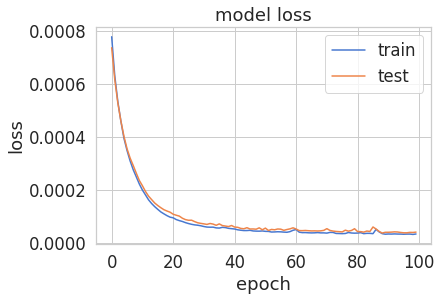

In [20]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [21]:
predictions = autoencoder.predict(X_test)

In [22]:
pd.DataFrame(predictions).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.001930,0.0,0.000000,0.012130,0.041681
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00007,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.003375
2,0.001526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000804,0.000000,0.002631
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00036,0.0,...,0.0,0.0,0.0,0.0,0.000682,0.002178,0.0,0.000000,0.013351,0.039405
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000350,0.0,0.000000,0.006967,0.057265


In [23]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
d=pd.DataFrame(error_df)
thr_per=95
print(thr_per,"th percentile recon error", np.percentile(mse, thr_per))
d[d.reconstruction_error>np.percentile(mse, thr_per)]



95 th percentile recon error 9.749070223858941e-05


,reconstruction_error,true_class
287,0.000112,1
333,0.000098,0
63,0.000240,0
616,0.000206,1
697,0.000218,0
959,0.000101,1
534,0.000453,1
55,0.000101,0
44,0.000201,1
704,0.000185,1


In [24]:
dd=pd.concat([pd.DataFrame(y_test),d.reconstruction_error],axis=1)
dd.to_csv("da.csv")